In [1]:
#Step-1: Importing the required libraries

import cv2
import easygui
import numpy as np
import imageio


import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

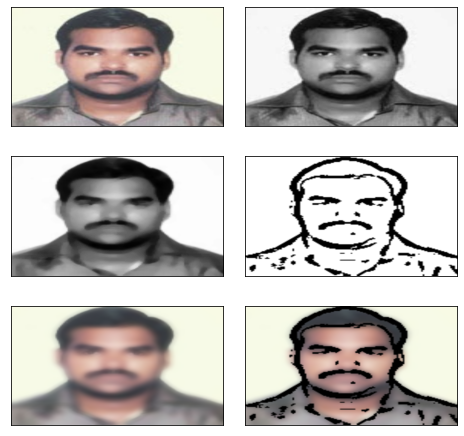

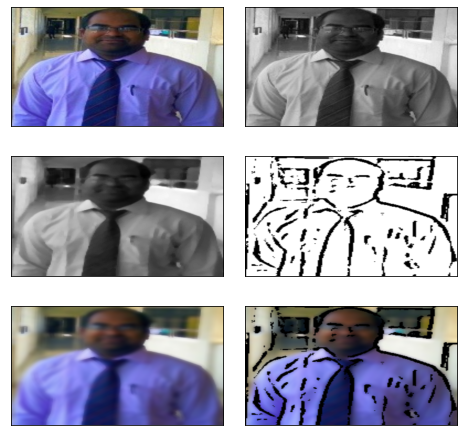

In [2]:
#Step-11(i): Develop the main window for the application (top 5 lines of code)

top=tk.Tk()
top.geometry('600x600')
top.title('$$Cartoonifier$$')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

#Step-2: Generation of a file box to select an interesting file

def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)
    

def cartoonify(ImagePath):

#Step-3: Storing of an image using CV2 library
    
    # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm whether the image is selected or not
    if originalmage is None:
        print("Image can not be located. Select the appropriate image file!!!")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')

#Step-4: Transform the input image into grayscale image

    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    #plt.imshow(ReSized2, cmap='gray')

#Step-5: Smoothening the transformed grayscale image
    
    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(ReSized3, cmap='gray')

#Step-6: The edges of the image to be retrieved
    
    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    #plt.imshow(ReSized4, cmap='gray')

#Step-7: Image Mask is to be generated 
    
    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #plt.imshow(ReSized5, cmap='gray')

#Step-8: Generating the Cartoon Effect on the image

    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')

#Step-9: All the transitions will be plotted.

    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]

    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

#Step-11(iii): Develop the save button in the main window of the application.
        
    save1=Button(top,text="Save the obtained cartoon",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()

#Step-10: User can save the cartoon generated using save button
    
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)
    
#Step-11(ii): Develop the Cartoonifier button in the main window of the application
    
upload=Button(top,text="Upload Imagae for Cartoonification",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()